In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow 
import keras
from tensorflow.keras import Model
import numpy as np
from glob import glob
import zipfile
import os

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
from zipfile import ZipFile
file_name = "archive.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
train_path = (r'C:\Users\rajes\OneDrive\Desktop\mlpro\Split_smol\train')
test_path = (r'C:\Users\rajes\OneDrive\Desktop\mlpro\Split_smol\val')

In [10]:
(train,val),(train,val)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [11]:
train.shape

(10000, 28, 28)

In [13]:
val.shape

(10000,)

In [14]:
np.max(train)

np.uint8(255)

In [15]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [16]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [17]:
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

In [18]:
x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=9, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 23,119,145 (88.19 MB)

 Trainable params: 1,711,241 (6.53 MB)

 Non-trainable params: 21,407,904 (81.66 MB)

In [19]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(r'C:\Users\rajes\OneDrive\Desktop\mlpro\Split_smol\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 697 images belonging to 9 classes.


In [22]:
test_set = test_datagen.flow_from_directory(r'C:\Users\rajes\OneDrive\Desktop\mlpro\Split_smol\val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 181 images belonging to 9 classes.


In [23]:
batch_size = 32
# Adjust the steps per epoch if needed
steps_per_epoch = len(training_set) // batch_size
validation_steps = len(test_set) // batch_size

In [24]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=8,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    #workers=4,  # Use workers if necessary for multi-threaded processing
    #use_multiprocessing=True  # Use multiprocessing if beneficial
)

c:\Users\rajes\anaconda3\envs\ml\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2659 - loss: 2.1068

c:\Users\rajes\anaconda3\envs\ml\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.2692 - loss: 2.0943 - val_accuracy: 0.5635 - val_loss: 1.2147
Epoch 2/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5891 - loss: 1.0854 - val_accuracy: 0.6464 - val_loss: 0.9691
Epoch 3/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6710 - loss: 0.9355 - val_accuracy: 0.6906 - val_loss: 0.8469
Epoch 4/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6814 - loss: 0.8078 - val_accuracy: 0.6740 - val_loss: 0.8586
Epoch 5/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7725 - loss: 0.6495 - val_accuracy: 0.5856 - val_loss: 0.9299
Epoch 6/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7737 - loss: 0.5920 - val_accuracy: 0.7348 - val_loss: 0.7004
Epoch 7/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8523 - loss: 0.4035 - val_accuracy: 0.7072 - val_loss: 1.0573
Epoch 8/8
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8509 - loss: 0.4150 - val_accuracy: 0.7403 - val_loss: 0.8067


In [25]:
model.save("skin_disease.h5")

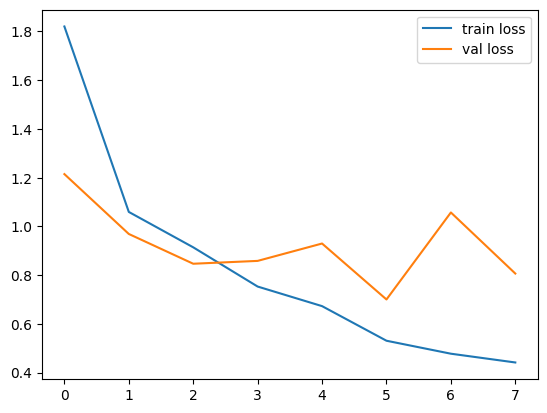

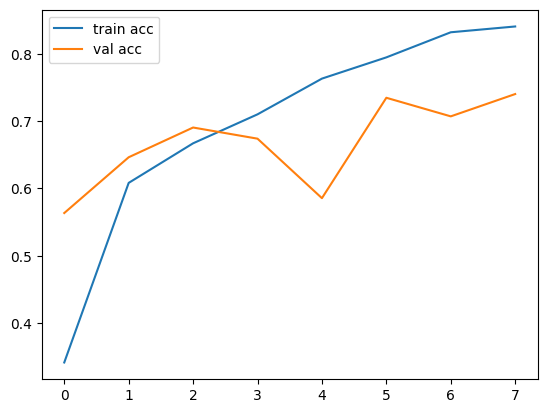

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
   

In [27]:
classes = ["Actinic keratosis" , "Benign keratosis" , "Dermatofibroma" , "Melanocytic nevus" , "Melanoma" , "Squamous cell carcinoma" , "Squamous cell carcinoma" , "Vascular lesion"]

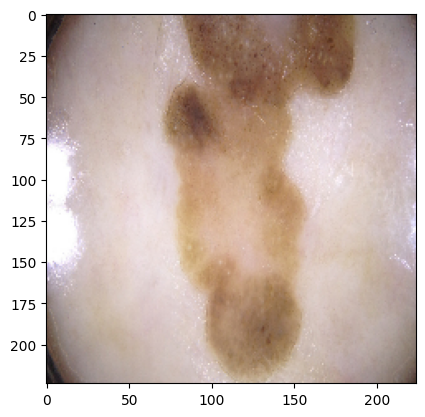

In [28]:
from tensorflow.keras.preprocessing import image
im = image.load_img(r'C:\Users\rajes\OneDrive\Desktop\mlpro\Split_smol\val\Benign keratosis\ISIC_0014567_downsampledled.jpg', target_size=(224, 224))
plt.imshow(im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1.4704641e-06 4.1659645e-09 9.9964154e-01 4.7570848e-06 1.3406545e-05
  1.8020147e-04 1.5853057e-04 1.6149118e-08 1.4410362e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Benign keratosis


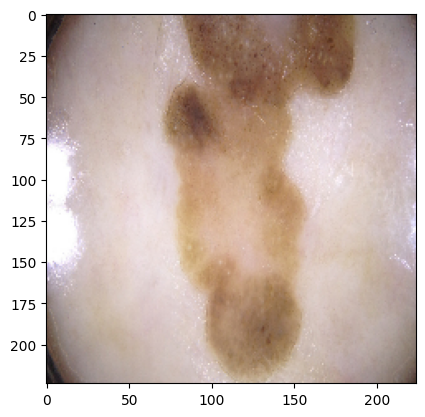

In [29]:
x=image.img_to_array(im)
x=x/255
plt.imshow(im)
x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
print(model.predict(x))
print(classes[np.argmax(model.predict(x))])


In [30]:
def predict_image(img):
    plt.figure(figsize=(20,8))
    print()
    print('-----------------------------------skin disease Type Detection---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


-----------------------------------skin disease Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Benign keratosis


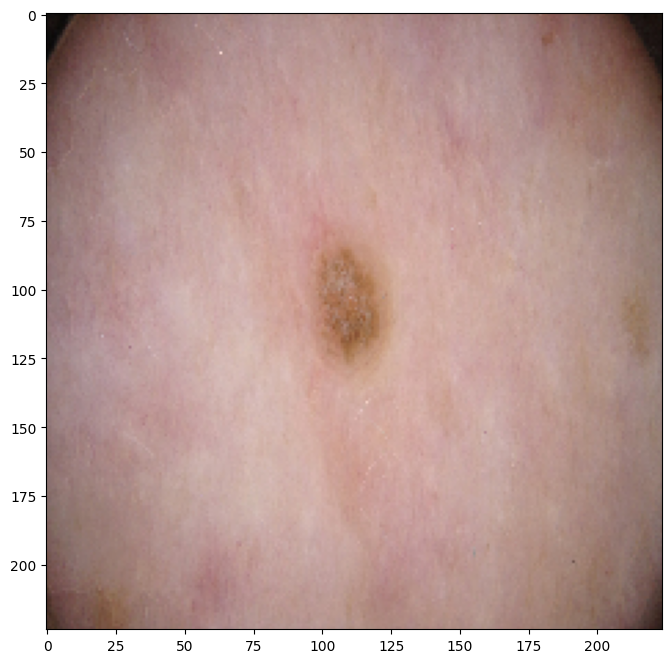

In [31]:
from tensorflow.keras.preprocessing import image
im=image.load_img(r'C:\Users\rajes\OneDrive\Desktop\mlpro\Split_smol\val\Benign keratosis\ISIC_0014625_downsampleded.jpg',target_size=(224,224))
predict_image(im)


-----------------------------------skin disease Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Dermatofibroma


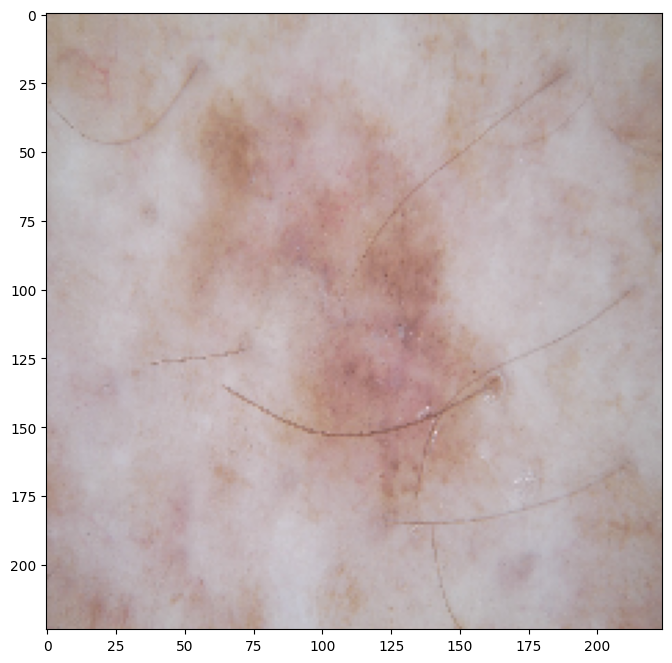

In [32]:
im4=image.load_img(r'C:\Users\rajes\OneDrive\Desktop\mlpro\Split_smol\val\Melanoma\ISIC_000016754.jpg',target_size=(224,224))
predict_image(im4)